## **Import Libraries**
___

In [554]:
# Import Analytical Libraries
import pandas as pd
import numpy as np 

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Libraries
from scipy.stats import kurtosis, skew, shapiro
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Misc Libraries
from typing import Optional, Union

## **Read Files**
___

In [555]:
# Read in the HR attrition csv file.
df = pd.read_csv('HR-Employee-Attrition.csv')

# Return all columns when displaying dataframe.
pd.set_option('display.max_columns', None)

# Set the style of the plots
plt.style.use('ggplot')
# Set default colormap for continuous data (both Matplotlib and Seaborn)
plt.rcParams['image.cmap'] = 'rocket'
# Set default palette for categorical data
sns.set_palette('rocket')

## **Dataset Identification**
___

In [556]:
# Return the shape and size of the dataset
print(f'Shape of the dataset: {df.shape}\nSize of the dataset: {df.size}')

Shape of the dataset: (1470, 35)
Size of the dataset: 51450


In [557]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [558]:
# Return the datatypes of each feature in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [559]:
# Reaturn the top 5 rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [560]:
# Return the bottom 5 rows of the dataset
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


## **Dataset Preprocessing**
___

#### 1. **Dataset Subsets**

##### 1.1 **Numeric Subsets**

In [561]:
# Return a subset of the dataset with the numeric features only
numeric_subset = df.select_dtypes(include='number')
numeric_subset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [562]:
# Return the total number of unique values in each feature
numeric_unique_ser = numeric_subset.apply(lambda x: x.nunique())
numeric_unique_ser

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [563]:
# Return the  index of all the discrete features in the dataset
discrete_features = numeric_unique_ser[numeric_unique_ser < numeric_subset.shape[0] * (10 / 100)].index
discrete_features

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [564]:
# These features represent the continuous numeric features in the dataset
numeric_unique_ser[numeric_unique_ser > numeric_subset.shape[0] * (10 / 100)]

DailyRate          886
EmployeeNumber    1470
MonthlyIncome     1349
MonthlyRate       1427
dtype: int64

##### 1.2 **Categorical Subset**

In [565]:
# Store a subset of the categorical features of the dataset.
cat_subset = df.select_dtypes(exclude='number')
cat_subset

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [566]:
# Return the number of unique values in in feature of the subset
cat_subset.apply(lambda x: x.nunique())

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [567]:
# The BusinessTravel feature seems to contain values that are in degree of comparison.
# Return the unique values and confirm 
cat_subset['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

#### 2. **Descriptive Analysis**

In [568]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### 2.1 **Dispersion**

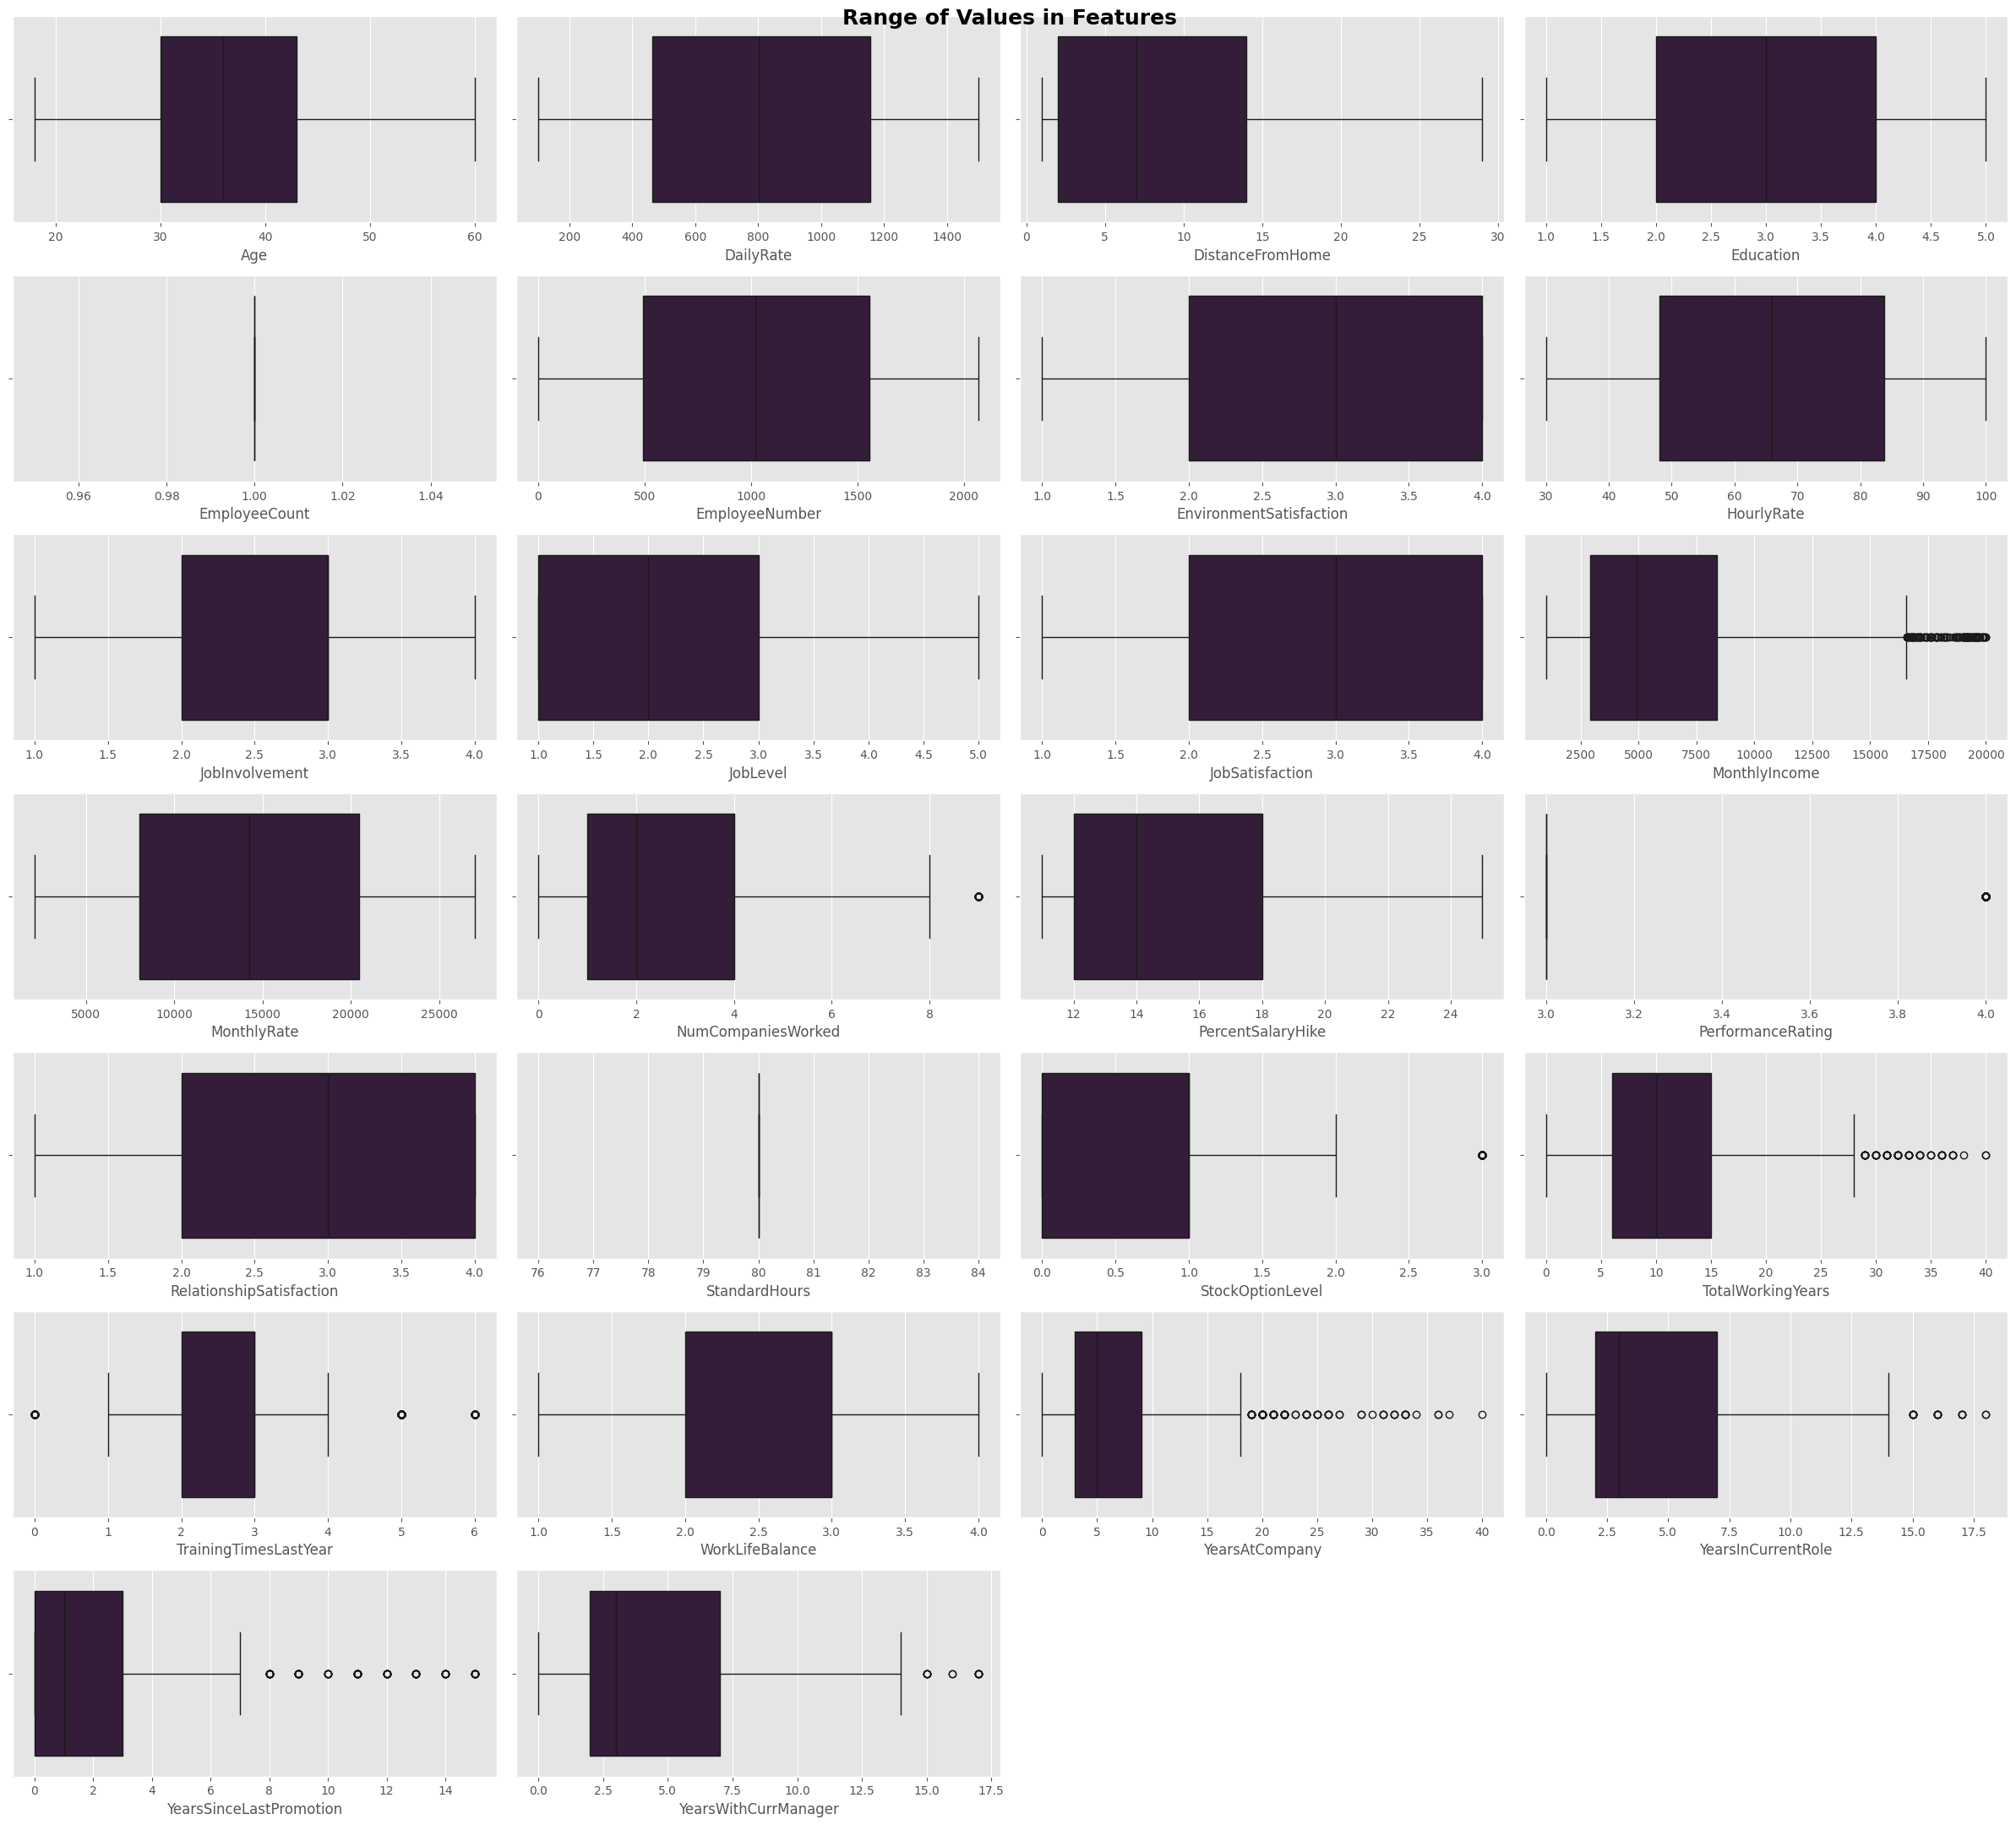

In [569]:
plt.figure(figsize=(24,22))
for i, feature in enumerate(numeric_subset):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(numeric_subset[feature], orient='h')

plt.suptitle('Range of Values in Features', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

##### 2.2 **Distribution**

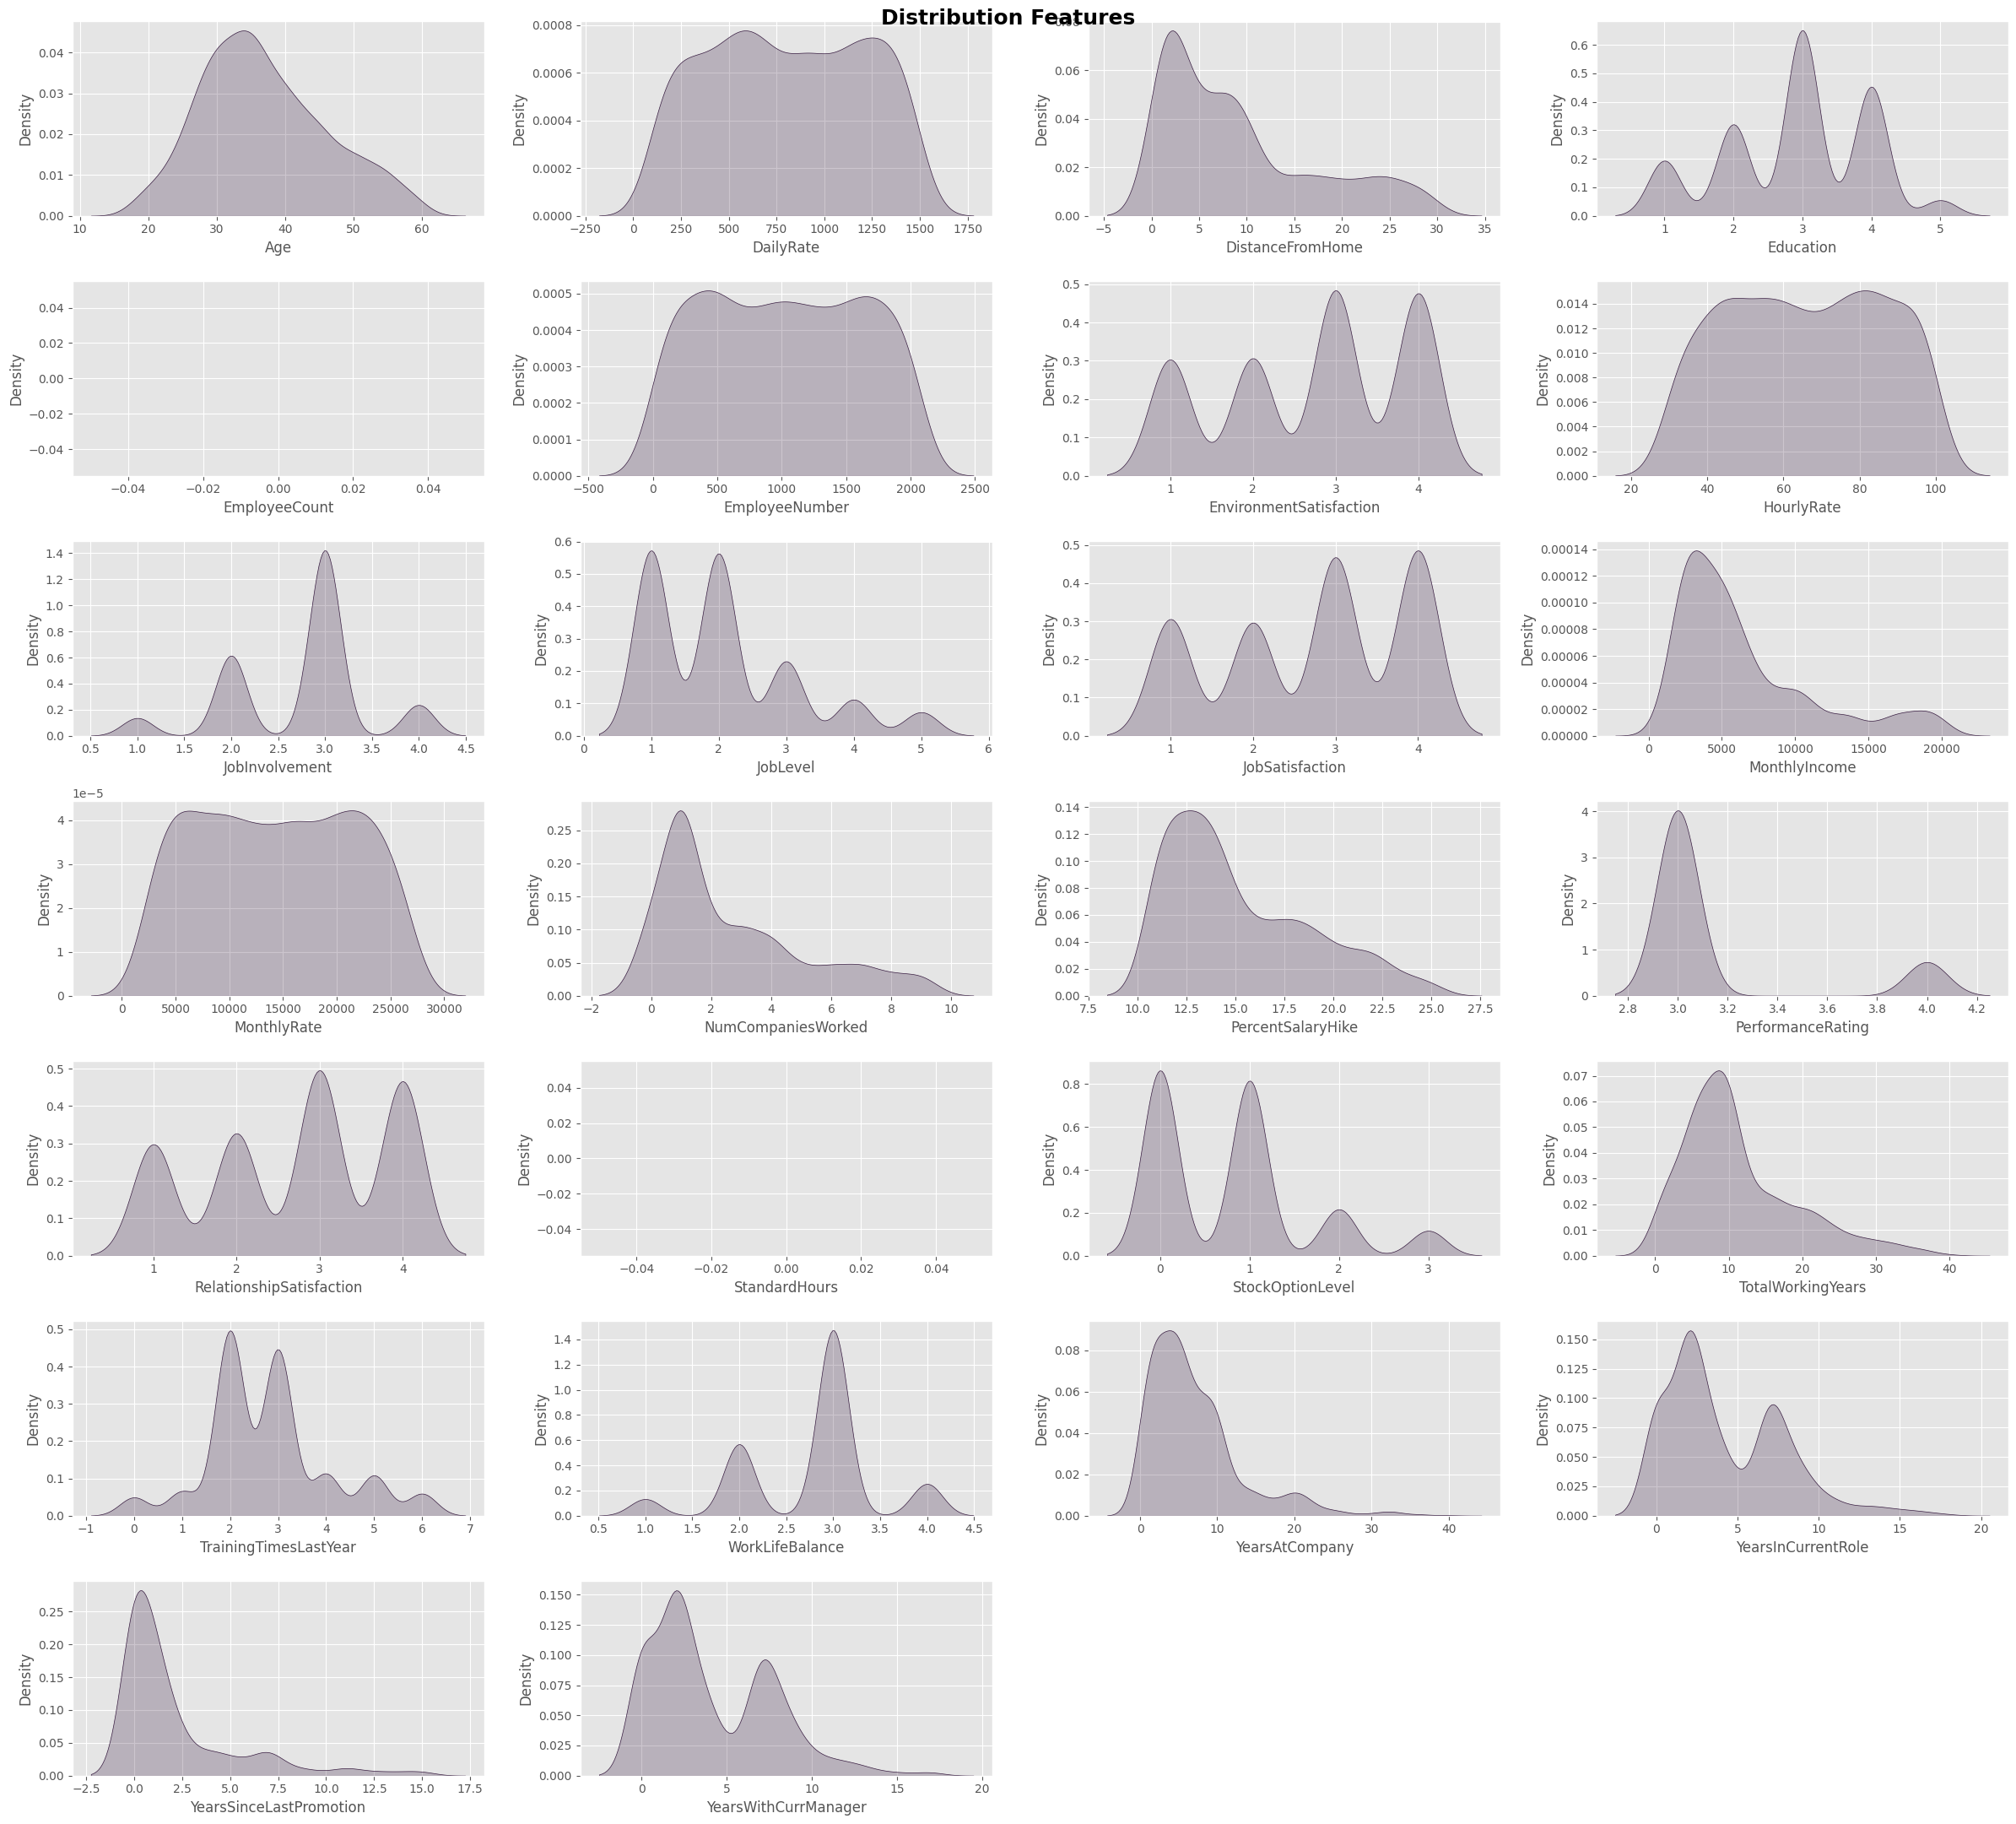

In [570]:
plt.figure(figsize=(24,22))
for i, feature in enumerate(numeric_subset):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(numeric_subset[feature], warn_singular=False, fill=True)

plt.suptitle('Distribution Features', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

##### 2.3 **Statistics**

In [571]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the Shapiro-Wilk test. These values help
    evaluate the distribution of the features of the dataframe passed in to the dataframe parameter. 

    Args: pandas.dataframe.
        - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        if dataframe[column].nunique() > 12:
            _skew = skew(dataframe[column])
            _kurtosis = kurtosis(dataframe[column], fisher=True)
            print(
                f"\n{column}\n"
                f"skew: {_skew:.4f}\n"
                f"kurtosis: {_kurtosis:.4f}"
            )

            # Perform Shapiro-Wilk test
            stat, p_value = shapiro(dataframe[column])

            # Print the results
            print(f"Shapiro-Wilk test: {stat:.4f}")
            print(f"P-value: {p_value:.4f}")

            # Interpret the p-value
            alpha = 0.05
            if p_value > alpha:
                print("The data is likely normally distributed (fail to reject H0).")
            else:
                print("The data is not normally distributed (reject H0).")

            # Check the absolute values of each skew value of a feature
            if np.abs(_skew) < 0.5:
                print('distribution is almost symmetrical')
            elif 0.5 <= np.abs(_skew) <= 1:
                print('distribution is modertely skewed')
            else:
                print('distribution is highly skewed')
            
            # Extremity of tail distribution
            if _kurtosis > 0:
                print(
                    f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with higher peakedness '
                    f'and a greater probability of extreme values.\n'
                )
            elif _kurtosis < 0:
                print(
                    f'Platykurtic distribution - lighter tails and a flatter peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with less peakedness ' 
                    f'and a lower probability of extreme values.\n'
                )
            else:
                print(
                    f'Mesokurtic distribution - similar peak and tail shape as the normal '
                    f'distribution.\n'
                    )
                

statistics(numeric_subset)


Age
skew: 0.4129
kurtosis: -0.4069
Shapiro-Wilk test: 0.9774
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


DailyRate
skew: -0.0035
kurtosis: -1.2038
Shapiro-Wilk test: 0.9544
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


DistanceFromHome
skew: 0.9571
kurtosis: -0.2281
Shapiro-Wilk test: 0.8616
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is modertely skewed
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
T

##### **`DESCRIPTIVE ANALYSIS SUMMARY`**:
 
1. **Dispersion**
    - Based on the the boxplots, we can see that the features `StandardHours`, `PerformanceRating`, and `EmployeeCount` features do not have a variance in their values, and that these are single values features, excluding the PerformanceRating feature, which is a two-value feature.

    - We can also gather from the boxplots that even though not extreme, we do have have features with outlier values. these features include: `YearsWithCurrManager`, `YearsSinceLastPromotion`, `YearsInCurrentRole`, `YearsAtCompany`, `TraininngTimesLastyYear`, `StockOptionLevel`, `TotalWorkingYears`, `PerformanceRating`, `NumCompaniesWorked` and `MonthlyIncome`. With some of these features, for example, PerformanceRating with little variance in the range of values, it suggests a biase towards a particular value for that feature, rather than values of any significant value. 

2. **Distribution**
    - `Age` has a slight positive skew, and has a shape that closely resembles a gaussian distribution, which can be seen in its distribution graph.
    
    - `StandardHours` and `EmployeeCount` can be seen to have no range of values, which further reiterates the information we  got from viewing the dispersion of the values of the feature using the boxplots. 

    - `MonthlyRate`, `HourlyRate`, `DailyRate`, and `EmployeeNumber` have a shape that suggests a `platykurtic shape`, suggesting that there are fewer extreme values in the features, and that the distribution of the values are wider, and more spread out around the mean value of the feature. This can be seen with the flat top of the graph. 

    - `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction`, `StockOptionLevel` are all label encoded features or representing ordinal information. This can be seen with the multiple peaks of the graph. 

    - `DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentageSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`, are all discrete numeric features, and all have a positve skew.

3. **Statistics**

| Feature | Skew | Null Hypothesis | Distribution Type | Transformation | Scale Method |
| ------- | ---- | --------------- | ----------------- | -------------- | ------------ |
| Age | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) |
| DailyRate | -ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| DistanceFromHome | Moderately Skew +ve | Reject | Platykurtic  | No | Normalization(MinMaxScaler) | 
| EmployeeNumber | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| HourlyRate | -ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| MonthlyIncome |highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| MonthlyRate | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| PercentSalaryHike | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| TotalWorkingYears | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsAtCompany | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsInCurrentRole | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 
| YearsSinceLastPromotion | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsWithCurrManager | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 

#### 3. **Duplicated Values**


In [572]:
# Return the total number of duplicate values in the dataset
dupes = df.duplicated().sum()
print(f'Total number of duplicates in the dataset: {dupes}')

Total number of duplicates in the dataset: 0


#### 4. **Null Values**

In [573]:
# Return the total number of null values in the dataset
nulls = np.count_nonzero(df.isnull().values)
print(f'Total number of null values in the dataset: {nulls}')

Total number of null values in the dataset: 0


#### 5. **Outlier Values**

In [574]:
def outlierIQR(column: str, dataframe: Optional[pd.DataFrame]=df) -> None:
    """
    A function that outputs features from the pandas.dataframe object passed in the dataframe 
    parameter that have outlier values, and the total number of outlier values in the feature. 
    The outliers are found using the IQR method. 

    Args:
        column: string.
            - Name of the column that can be found within the pandas.dataframe object passed in the dataframe
            parameter.
        dataframe: pandas.dataframe.
            - A pandas dataframe.

    Returns:
        None
    """
    # Store the quantile values 
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Return the interquartile range
    IQR = q3 - q1

    # Create the upper and lower limits 
    upper_limit = dataframe[column] > q3 + (IQR * 1.5)
    lower_limit = dataframe[column] < q1 - (IQR * 1.5)

    # Return the outliers of the feature
    outliers = dataframe[column][upper_limit | lower_limit]

    if len(outliers) > 0:
        print(f'{column}\nTotal Outliers: {len(outliers)}\n')


for feature in numeric_subset:
    outlierIQR(feature)

MonthlyIncome
Total Outliers: 114

NumCompaniesWorked
Total Outliers: 52

PerformanceRating
Total Outliers: 226

StockOptionLevel
Total Outliers: 85

TotalWorkingYears
Total Outliers: 63

TrainingTimesLastYear
Total Outliers: 238

YearsAtCompany
Total Outliers: 104

YearsInCurrentRole
Total Outliers: 21

YearsSinceLastPromotion
Total Outliers: 107

YearsWithCurrManager
Total Outliers: 14



#### 6. **Feature Engineering**

##### 6.1 **Bin Age Feature**

In [575]:
# Create a copy of the dataframe 
df2 = df.copy()

In [576]:
# Store the desired labels for the binning of the Age feature.
age_labels = ['0 - 18', '19 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65']
# Store the bin values 
age_bins = [0, 18, 25, 35, 45, 55, 65]

# Bin the values and store as a variable
age_feature_binning = pd.cut(df2['Age'], bins=age_bins, labels=age_labels)

# Insert the values on the right of the Age feature.
df2.insert(df2.columns.get_loc('Attrition'), 'AgeBin', age_feature_binning)

##### 6.2 **Bin MonthlyIncome Feature**

In [577]:
# Create a copy of the dataframe
df3 = df2.copy()

<Axes: xlabel='MonthlyIncome'>

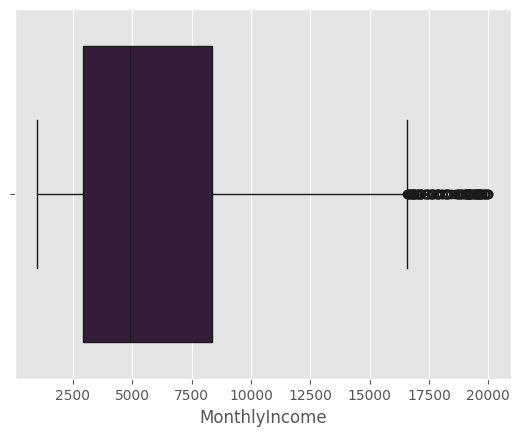

In [578]:
# Visualize boxplot of the feature
sns.boxplot(df3['MonthlyIncome'], orient='h')

In [579]:
# Use quantile values to determine values to bin with 
q1 = df3['MonthlyIncome'].quantile(0.25)
q2 = df3['MonthlyIncome'].quantile(0.5)
q3 = df3['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1 
whisker = q3 + (iqr * 1.5)

# Store the labels for the binning of the MonthlyIncome feature
income_labels = ['Low', 'Middle to High', 'High', 'Extreme']
# Store bin values
income_bins = [0, q1, q3, whisker, np.inf]

# Bin the values and store as a variable
income_feature_bin = pd.cut(df3['MonthlyIncome'], bins=income_bins, labels=income_labels)
# Insert the column to the lefft of the MonthlyRate feature.
df3.insert(df3.columns.get_loc('MonthlyRate'), 'IncomeBin', income_feature_bin)

##### 6.3 **Label Encoding**

In [580]:
# Create a copy of the dataframe
df4 = df3.copy()

# Create the mapping
encoding_mapping = {
    'Non-Travel': 1,
    'Travel_Rarely': 2,
    'Travel_Frequently': 3
}

# Apply encoding mapping
df4['BusinessTravel'] = df4['BusinessTravel'].map(encoding_mapping)

##### 6.4 **One-Hot Encoding**

In [582]:
df4.select_dtypes(exclude='number').columns

Index(['AgeBin', 'Attrition', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'IncomeBin', 'Over18', 'OverTime'],
      dtype='object')

In [583]:
# Create a copy of the dataframe
df5 = df4.copy()

# Store the categorical feaures
categorical_features = df4.select_dtypes(exclude='number').columns

# Store as encoded dataframe
encoded_df = pd.get_dummies(df5, columns=categorical_features, drop_first=True,dtype=int)
encoded_df

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeBin_19 - 25,AgeBin_26 - 35,AgeBin_36 - 45,AgeBin_46 - 55,AgeBin_56 - 65,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeBin_Middle to High,IncomeBin_High,IncomeBin_Extreme,OverTime_Yes
0,41,2,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,49,3,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,37,2,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,33,3,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,27,2,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1466,39,2,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1467,27,2,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1468,49,3,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0


##### 6.5 **Data Cleaning**

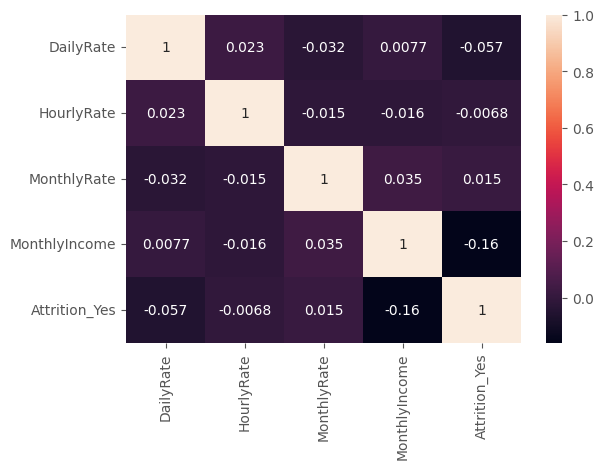

In [584]:
rate_subset = encoded_df.loc[:, ['DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes']]
sns.heatmap(rate_subset.corr(), annot=True)
plt.tight_layout()
plt.show()

`NOTES`:

* Based on the correlation matrix, we can see that there is no distinct relationship between 'DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome'. This is unusual because the names of the features suggests that they should be related to MonthlyIncome. Since there is no clear distinct relationship between the features, the DailyRate, HourlyRate, MonthlyRate will be dropped. 

In [585]:
# Drop EmployeeNumber, StandardHours, DailyRate, HourlyRate, Monthly Rate
encoded_df.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate',
                         'EmployeeNumber', 'StandardHours', 'EmployeeCount'], inplace=True)

In [586]:
encoded_df

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeBin_19 - 25,AgeBin_26 - 35,AgeBin_36 - 45,AgeBin_46 - 55,AgeBin_56 - 65,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeBin_Middle to High,IncomeBin_High,IncomeBin_Extreme,OverTime_Yes
0,41,2,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,49,3,8,1,3,2,2,2,5130,1,23,4,4,1,10,3,3,10,7,1,7,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,37,2,2,2,4,2,1,3,2090,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,33,3,3,4,4,3,1,3,2909,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,27,2,2,1,1,3,1,2,3468,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,23,2,3,4,2,4,2571,4,17,3,3,1,17,3,3,5,2,0,3,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1466,39,2,6,1,4,2,3,1,9991,4,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1467,27,2,4,3,2,4,2,2,6142,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1468,49,3,2,3,4,2,2,2,5390,2,14,3,4,0,17,3,2,9,6,0,8,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0


##### 6.6 **Feature Scaling**

In [587]:
def featureScaling(
        dataframe: pd.DataFrame, column: str, transform_features: list, skewed_features: list
) -> dict[str, np.ndarray]:
    """
    Applies different scaling or transformation techniques to a feature based on its characteristics.

    Args:
        - dataframe (pd.DataFrame): The DataFrame containing the features.
        - column (str): The name of the feature/column to scale or transform.
        - transform_features (list): List of feature names that need a log transformation 
        followed by robust scaling.
        - skewed_features (list): List of feature names that are skewed and require robust 
        scaling.

    Returns:
        - dict: A dictionary with the column name as the key and the scaled or transformed 
        feature values as the value.

    Raises:
    ValueError: If an incorrect column name is provided.
    """
    if column in transform_features:
        # Apply Log transformation
        transform = np.log1p(dataframe[[column]])

        # Instantiate the RobustScaler
        r_scaler = RobustScaler()
        # Fit and transform the feature
        transform_scale = r_scaler.fit_transform(transform)

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in skewed_features:
        # Instantiate the RobustScaler
        r_scaler = RobustScaler()

        # Fit the model with the feature
        transform_scale = r_scaler.fit_transform(dataframe[[column]])

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in dataframe.columns:
        # Instantiate MinMaxScaler
        scaler = MinMaxScaler()

        # Fit and transform using feature
        transform_scale = scaler.fit_transform(dataframe[[column]])

        # Store a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    else:
        raise ValueError(f"Incorrect column provided: {column}")

In [588]:
transform_scale_features = ['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'MonthlyIncome']
outlier_features = ['YearsInCurrentRole', 'YearsWithCurrManager']

table_data = {}
for column in encoded_df:
    data = featureScaling(encoded_df, column, transform_scale_features, outlier_features)
    table_data.update(data)

scaled_df = pd.DataFrame(table_data)

##### **`PREPROCESSING SUMMARY`**

1. **Age Feature Bin**
    - Binned the Age feature and added values `['0 - 18', '19 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65']`.

2. **MonthlyIncome Feature Bin**
    - Binned the MonthlyIncome feature and added values `['Low', 'Middle to High', 'High', 'Extreme']`

3. **Label Encoding**
    - Encoded the unique values in ascending order, with `No-Travel = 1, Travel_Rarely = 2, Travel_Frequently = 3`

4. **One-Hot Encoding**
    - Took the categorical features `['AgeBin', 'Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'IncomeBin', 'Over18', 'OverTime']` and applied one hot encoding. Dropped one column from each encoding to avoid multicolinearity. 

5. **Data Cleaning**
    - Dropped the following columns: `['DailyRate', 'HourlyRate', 'MonthlyRate','EmployeeNumber', 'StandardHours']`. StandardHours and EmployeeCount have no significant information as there is only one unique value through the entire feature values.

    - EmployeeNumber can also be dropped because there will be no statistical significance to the employee's number as predictor for attrition. 

    - DailyRate, HourlyRate and MonthlyRate have no significance to MonthlyIncome and no significance can be infered to Attrition, according to the correlation heatmap. 

## **Predictive Analysis**
___

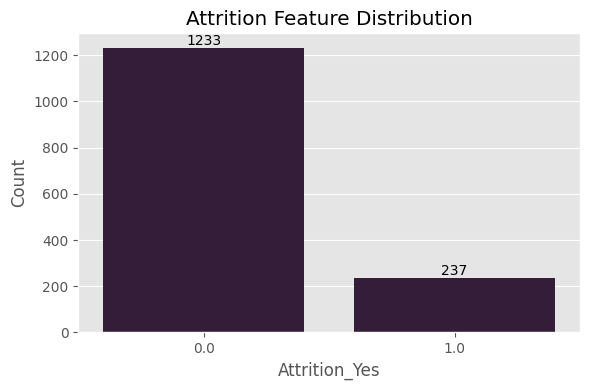

In [589]:
# Visualize the distribution of the Attrition_Yes feature
attrition_df = scaled_df.groupby('Attrition_Yes')[['Attrition_Yes']].count()

_, ax = plt.subplots(figsize=(6, 4))
sns.barplot(attrition_df, x=attrition_df.index, y=attrition_df['Attrition_Yes'])
ax.bar_label(ax.containers[0])
plt.title('Attrition Feature Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 1. **Splitting the data**

In [590]:
scaled_df.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeBin_19 - 25,AgeBin_26 - 35,AgeBin_36 - 45,AgeBin_46 - 55,AgeBin_56 - 65,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeBin_Middle to High,IncomeBin_High,IncomeBin_Extreme,OverTime_Yes
0,0.547619,0.5,0.000000,0.25,0.333333,0.666667,0.25,1.000000,0.186804,0.888889,0.000000,0.0,0.000000,0.000000,-0.242743,0.0,0.000000,0.168233,0.2,-0.500000,0.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.738095,1.0,0.250000,0.00,0.666667,0.333333,0.25,0.333333,0.039730,0.111111,0.857143,1.0,1.000000,0.333333,0.000000,0.5,0.666667,0.661510,0.8,0.000000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.452381,0.5,0.035714,0.25,1.000000,0.333333,0.00,0.666667,-0.809515,0.666667,0.285714,0.0,0.333333,0.000000,-0.385221,0.5,0.666667,-1.955449,-0.6,-0.500000,-0.6,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.357143,1.0,0.071429,0.75,1.000000,0.666667,0.00,0.666667,-0.496830,0.111111,0.000000,0.0,0.666667,0.000000,-0.242743,0.5,0.666667,0.442507,0.8,0.500000,-0.6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.214286,0.5,0.035714,0.00,0.000000,0.666667,0.00,0.333333,-0.330593,1.000000,0.071429,0.0,1.000000,0.333333,-0.546748,0.5,0.666667,-0.756471,-0.2,0.292481,-0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [591]:
# Isolate the dependent and the independent variables
X = scaled_df.drop(columns='Attrition_Yes')
y = scaled_df['Attrition_Yes']

# Split the variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE resampling to imbalanced dataset
sr = SMOTE(random_state=42)
X_resampled, y_resampled = sr.fit_resample(X_train, y_train)

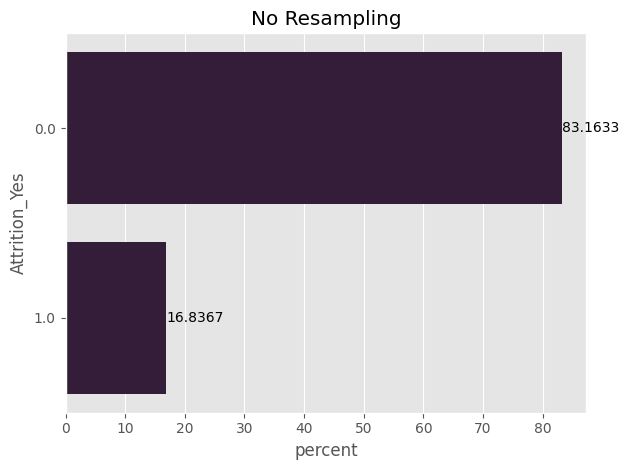

In [592]:
# Visualize data distribution without resampling
_, ax = plt.subplots()

sns.countplot(y=y_train, stat='percent')
plt.title('No Resampling')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

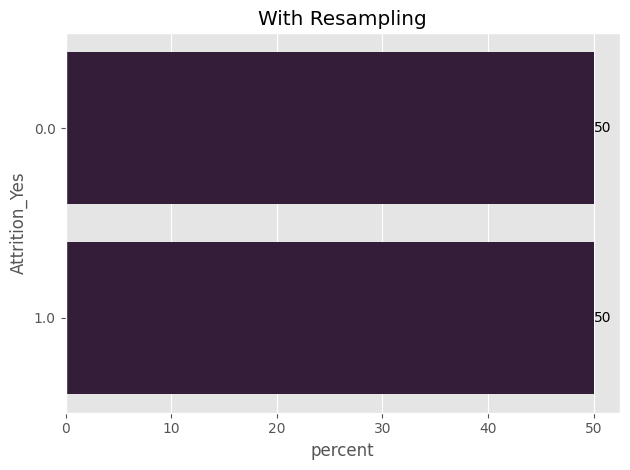

In [593]:
# Visualzie data distribution with resampling
_, ax = plt.subplots()

sns.countplot(y=y_resampled, stat='percent')
plt.title('With Resampling')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### 2. **Model Selection**

In [594]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [595]:
def modelPredict(
        model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                     xgb.XGBClassifier],
        X_train: Optional[pd.DataFrame]=X_train, 
        y_train: Optional[pd.DataFrame]=y_train,
        X_test: Optional[pd.DataFrame]=X_test,
        model_return: Optional[bool]=False
) ->np.ndarray:
    """
    Trains a model and makes predictions.

    Parameters:
        - model: A machine learning model (either LogisticRegression or RandomForestClassifier).
        - X_train: Training feature data.
        - y_train: Training labels.
        - X_test: Test feature data for prediction.

    Returns:
        - y_pred: Predicted labels for the test data, to be compared to known test data.
    """
    # Fit the model with training data
    model.fit(X_train, y_train)

    # Make predictions with the fitted model
    y_pred = model.predict(X_test)

    if model_return == True:
        return model, y_pred
    else:
        return y_pred


In [596]:
def modelEvaluation(y_predict: np.ndarray) -> None:
    """
    Evaluates the performance of a classification model by plotting a confusion matrix heatmap 
    and printing a classification report.

    Args:
        y_predict :
            - The predicted labels output by the model.

    Returns:
        None
    """
    # Generate the confusion matrix comparing actual and predicted labels
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    
    # Plot the confusion matrix using Seaborn with annotations
    sns.heatmap(conf_matrix, linewidths=0.5, annot=True, fmt=".0f", annot_kws={"size": 10}, cbar=None)
    
    # Generate a classification report showing precision, recall, f1-score, and support
    class_report_log_reg = classification_report(y_test, y_predict)
    
    # Print the classification report
    print(class_report_log_reg)

    # Visualize the heatmap
    plt.title('Correlation Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predict')
    plt.tight_layout()
    plt.show()


In [597]:
# Instantiate the models to be used
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

#### 2.1 **Logistic Regression**

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       255
         1.0       0.29      0.56      0.38        39

    accuracy                           0.76       294
   macro avg       0.61      0.68      0.62       294
weighted avg       0.84      0.76      0.79       294



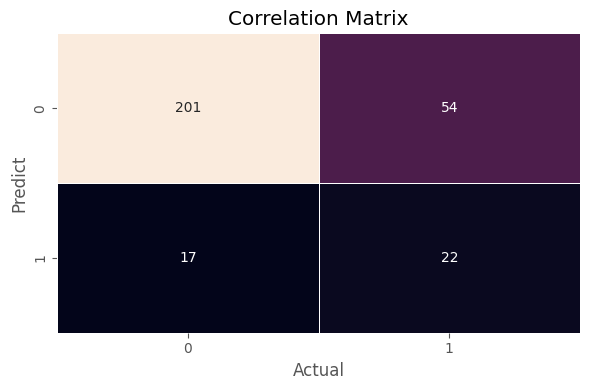

In [598]:
# Predict values using models 
y_predict_log = modelPredict(log_reg, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_log)

##### 2.1.2 **Hyperparameter Tuning**

In [599]:
def hyperParameterTuning(model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier],
                         param_grid: dict[str, Union[list, np.ndarray]],
                         X: Optional[pd.DataFrame]=X_train,
                         y: Optional[pd.DataFrame]=y_train):
    """
    Performs hyperparameter tuning using GridSearchCV for a given model and parameter grid.

    Args:
        - model (Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier]): 
            The machine learning model to be tuned. It can be an instance of LogisticRegression, 
            RandomForestClassifier, or GradientBoostingClassifier.
        
        - param_grid (dict[str, Union[list, np.ndarray]]): 
            The hyperparameters to search over. Keys are parameter names, and values are lists or arrays 
            of parameter values to test.
        
        - X (Optional[pd.DataFrame]): 
            The training feature data. If not provided, defaults to X_train
        
        - y (Optional[pd.DataFrame]): 
            The target data. If not provided, defaults to y_train

    Returns:
        - Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier]: 
            The model with the best hyperparameters found during the search.
    """
    # Instantiate gridsearch
    clf = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    # Fit the model
    best_clf = clf.fit(X, y)

    return best_clf

In [600]:
# Store the parameter grid for log_reg model
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

log_hyp_model = hyperParameterTuning(log_reg, lr_param_grid)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits


c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
924 fits failed out of a total of 2016.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo S145\Downloads\hr

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       255
         1.0       0.29      0.56      0.38        39

    accuracy                           0.76       294
   macro avg       0.61      0.68      0.62       294
weighted avg       0.84      0.76      0.79       294



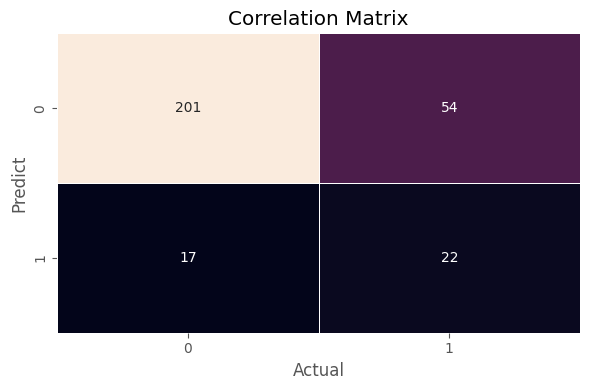

In [601]:
y_hyp_predict = modelPredict(log_hyp_model.best_estimator_, X_train=X_resampled, y_train=y_resampled)
modelEvaluation(y_hyp_predict)


#### 2.2 **RandomForestClassifier**

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       255
         1.0       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294



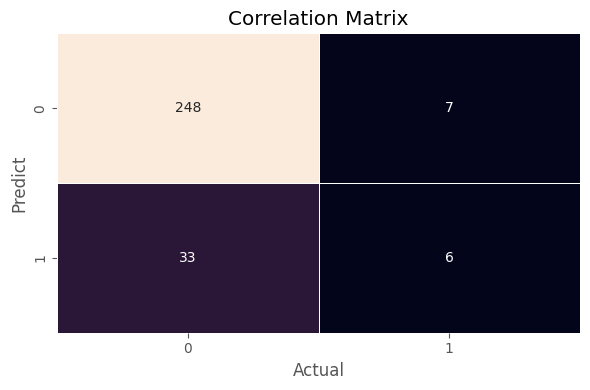

In [602]:
# Fit the model
y_predict_rfc, rfc_model = modelPredict(rf_clf, X_train=X_resampled, y_train=y_resampled, model_return=True)
# Evaluate predictions
modelEvaluation(y_predict_rfc)

In [ ]:
rfc_model.feature_importance_

##### 2.2.2 **Hyperparameter Tuning**

In [603]:
# Store the parameter grid for log_reg model
rfc_param_grid = {
    'n_estimators': [50, 100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20,  None],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_leaf': [1, 5, 10]
}


rfc_hyp_model = hyperParameterTuning(rf_clf, rfc_param_grid)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
710 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\base.py", line 666, in 

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       255
         1.0       0.50      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.69      0.57      0.58       294
weighted avg       0.83      0.87      0.84       294



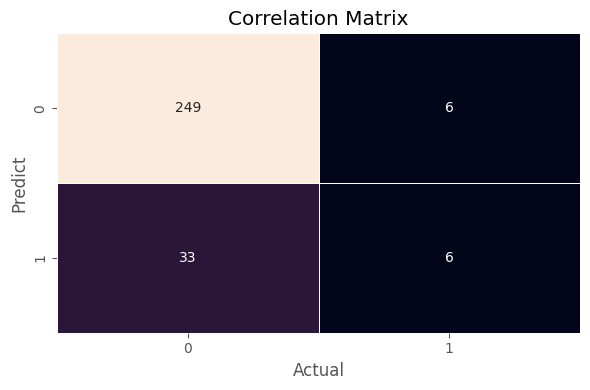

In [604]:
y_hyp_rfc_predict = modelPredict(rfc_hyp_model.best_estimator_, X_train=X_resampled, y_train=y_resampled)
modelEvaluation(y_hyp_rfc_predict)

#### 2.3 **GradientBoostingClassifier**

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       255
         1.0       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



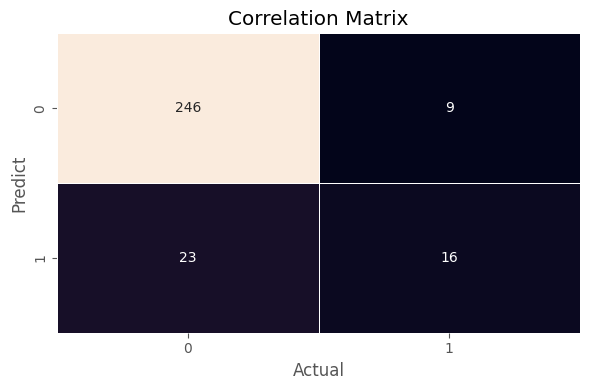

In [605]:
# Predict values using models 
y_predict_gbc = modelPredict(gb_clf, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_gbc)

##### 2.3.2 **Hyperparameter Tuning**

In [606]:
# Store the parameter grid for log_reg model
gbc_param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 300, 500],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [3, 5, 7, 9, None],
    'max_features': ['auto', 'sqrt', 'log2'],
}

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
406 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\sklearn\base.py", line 666, in 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       255
         1.0       0.71      0.51      0.60        39

    accuracy                           0.91       294
   macro avg       0.82      0.74      0.77       294
weighted avg       0.90      0.91      0.90       294



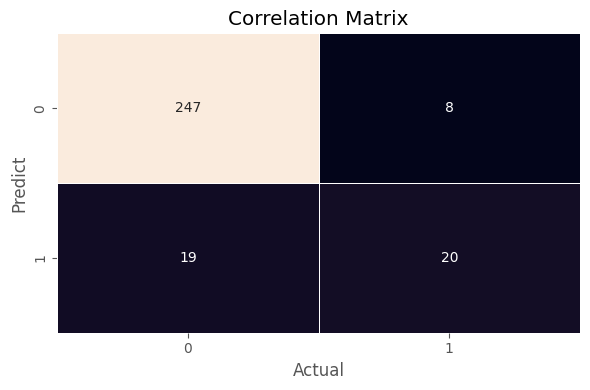

In [607]:
gbc_hyp_model = hyperParameterTuning(gb_clf, gbc_param_grid)
y_hyp_gbc_predict = modelPredict(gbc_hyp_model.best_estimator_, X_train=X_resampled, y_train=y_resampled)
modelEvaluation(y_hyp_gbc_predict)

In [ ]:
gbc_hyp_model.feature_importances_

#### 2.4 **XGBoost**

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       255
         1.0       0.50      0.33      0.40        39

    accuracy                           0.87       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.85      0.87      0.86       294



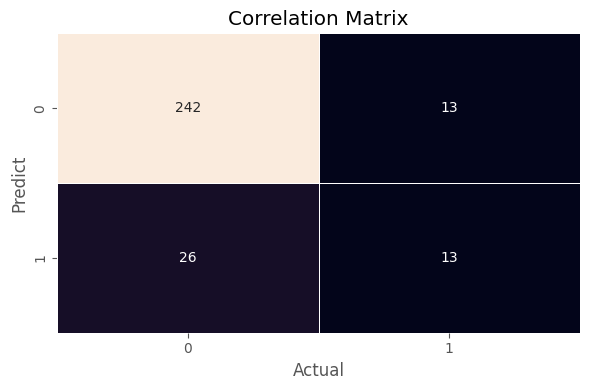

In [608]:
# Predict values using models 
y_predict_xgb = modelPredict(xgb_clf, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_xgb)

##### 2.4.2 **Hyperparameter Tuning**

In [609]:
# Store the parameter grid for log_reg model
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       255
         1.0       0.59      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.86      0.88      0.87       294



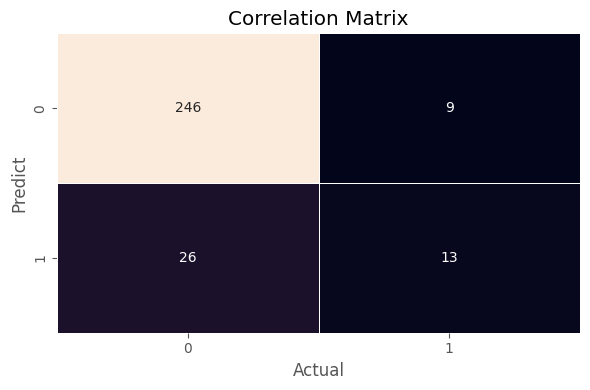

In [610]:
xgb_hyp_model = hyperParameterTuning(xgb_clf, xgb_param_grid)
y_hyp_xgb_predict = modelPredict(xgb_hyp_model.best_estimator_, X_train=X_resampled, y_train=y_resampled)
modelEvaluation(y_hyp_xgb_predict)

#### 2.2 **Model Evaluation**

In [611]:
def modelScoresCompare(models: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                                     xgb.XGBClassifier],
                       model_names: list,
                       X_train: Optional[pd.DataFrame]=X_train,
                       X_test: Optional[pd.DataFrame]=X_test,
                       y_train: Optional[pd.DataFrame]=y_train,
                       y_test: Optional[pd.DataFrame]=y_test,
    ) -> pd.DataFrame:
    """
    Compare the training and test scores of multiple classification models and return a dataframe
    with the results, including the percentage difference between the train and test scores.
    
    Args:
        models : Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
        xgb.XGBClassifier].
            - A list of trained classification models to compare.
            
        model_names : list.
            - A list of strings representing the names of the models 
            (must correspond to the order of the models).

        X_train : Optional[pd.DataFrame].
            - The feature matrix used for training the models. Default is X_train.

        X_test : Optional[pd.DataFrame].
            - The feature matrix used for testing the models. Default is X_test.

        y_train : Optional[pd.DataFrame]
            - The target vector used for training the models. Default is y_train.

        y_test : Optional[pd.DataFrame]
            - The target vector used for testing the models. Default is y_test.

    Returns:
        pd.DataFrame.
            A dataframe with the train scores, test scores, and the percentage difference
            between test and train scores for each model.
    """
    # Use list comprehension to find the test scores for the training and test samples
    train_scores = [model.score(X_train, y_train) for model in models]
    test_scores = [model.score(X_test, y_test) for model in models]

    # Create a dataframe 
    data = {
        'TrainScores': train_scores,
        'TestScores': test_scores
    }
    model_scores_df = pd.DataFrame(data, index=model_names)
    model_scores_df['PercentageDifference'] = model_scores_df['TestScores'] - model_scores_df['TrainScores']

    # Convert the values to a percentage 
    model_scores_df = model_scores_df.apply(lambda x: round(x * 100, 2))

    return model_scores_df

In [612]:
def modelFitEvaluation(dataframe: pd.DataFrame) -> np.ndarray: 
    """
    Classifies models into 'Good fit', 'Overfit', or 'Underfitted' based on 
    training and test scores, as well as the percentage difference between them.

    Args:
        dataframe : pandas.DataFrame
            A dataframe containing the following columns:
            - 'TrainScores': Model scores on the training set.
            - 'TestScores': Model scores on the test set.
            - 'PercentageDifference': The percentage difference between 'TrainScores' and 'TestScores'.
    
    Returns:
    numpy.ndarray
        An array of classifications for each row in 'dataframe', where each entry is either:
        - 'Good fit': When both training and test scores are high (above 70%) 
        and the percentage difference is <= 10%.
        - 'Overfit': When both training and test scores are high, but the percentage difference is > 10%.
        - 'Underfitted': When either training or test scores are low (<= 70%).
    """
    # Masks for good fit and overfitting and underfitting
    good_fit_mask = (
        ((dataframe['TrainScores'] > 70) & (dataframe['TestScores'] > 70)) & 
        (np.abs(dataframe['PercentageDifference']) <= 10)
    )
    overfit_mask = (
        ((dataframe['TrainScores'] > 70) & (dataframe['TestScores'] > 70)) & 
        (np.abs(dataframe['PercentageDifference']) > 10)
    )
    underfit_mask = (
        ((dataframe['TrainScores'] <= 70) | (dataframe['TestScores'] <= 70))
    )

    # Applying the condition to assign labels
    model_evaluation = np.where(good_fit_mask, 'Good fit',
                                np.where(overfit_mask, 'Overfit',
                                         np.where(underfit_mask, 'Underfitted', 'Unknown')))
    return model_evaluation

In [613]:
# List the models used 
models = [log_reg, rf_clf, gb_clf, xgb_clf, log_hyp_model, rfc_hyp_model, gbc_hyp_model, xgb_hyp_model]

# Store the name of the models used
model_names  = ['Logistic Regression', 'Random Forest Classifier',
                'Gradient Boosting Classifier', 'XGBoosting Classifier', 
                'Logistic Regression (tuned)', 'Random Forest Classifier (tuned)',
                'Gradient Boosting Classifier (tuned)', 'XGBoosting Classifier (tuned)',]
model_scores_df = modelScoresCompare(models, model_names, X_train=X_resampled, y_train=y_resampled)
model_scores_df['ModelEvaluation'] = modelFitEvaluation(model_scores_df)
model_scores_df

,TrainScores,TestScores,PercentageDifference,ModelEvaluation
Logistic Regression,82.62,75.85,-6.77,Good fit
Random Forest Classifier,100.00,86.39,-13.61,Overfit
Gradient Boosting Classifier,96.83,89.12,-7.71,Good fit
XGBoosting Classifier,100.00,86.73,-13.27,Overfit
Logistic Regression (tuned),82.62,75.85,-6.77,Good fit
Random Forest Classifier (tuned),100.00,86.73,-13.27,Overfit
Gradient Boosting Classifier (tuned),96.06,90.82,-5.25,Good fit
XGBoosting Classifier (tuned),96.22,88.10,-8.12,Good fit


In [614]:
print(f'Model to train: {model_scores_df['TestScores'].idxmax()}')

Model to train: Gradient Boosting Classifier (tuned)


## **Save Model**
___

In [615]:
#  Import pickle 
import pickle 

# Use context manager to write pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(gbc_hyp_model, f)

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       255
         1.0       0.71      0.51      0.60        39

    accuracy                           0.91       294
   macro avg       0.82      0.74      0.77       294
weighted avg       0.90      0.91      0.90       294



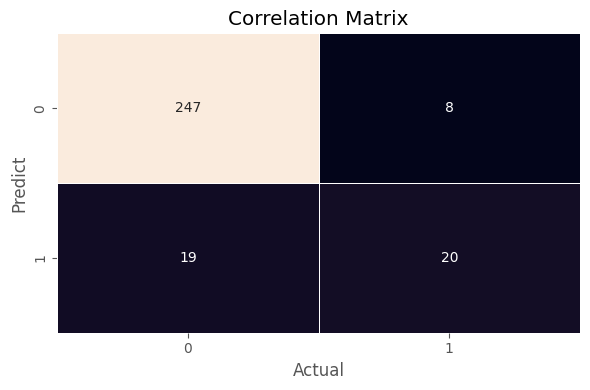

In [616]:
# Load the saved model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

#  Make predictions with X_test
y_pred_pickle = loaded_model.predict(X_test)

# Use classification report to return key evaluation metrics
modelEvaluation(y_pred_pickle)